In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# to display stats abpot data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#display number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# to check null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

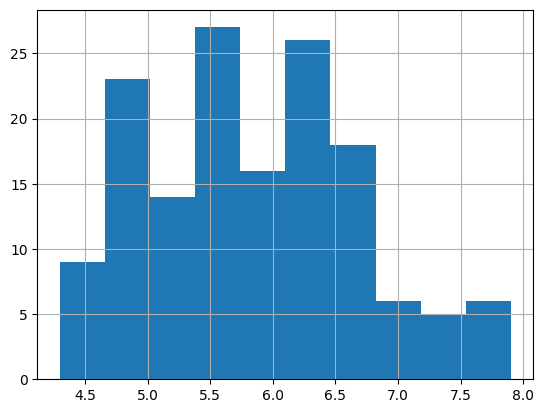

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

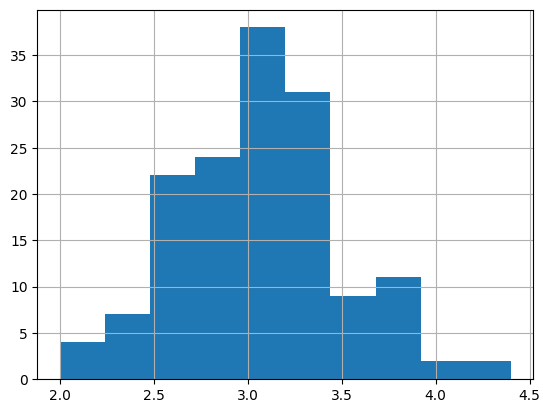

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

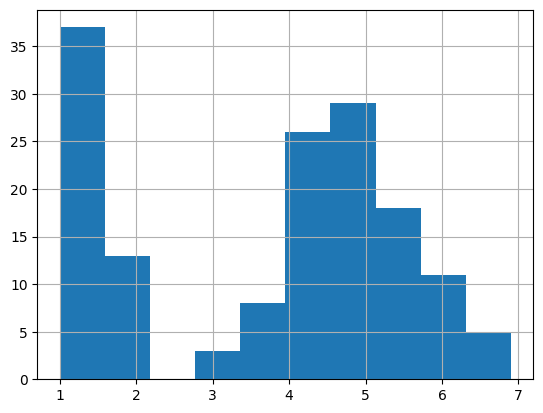

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

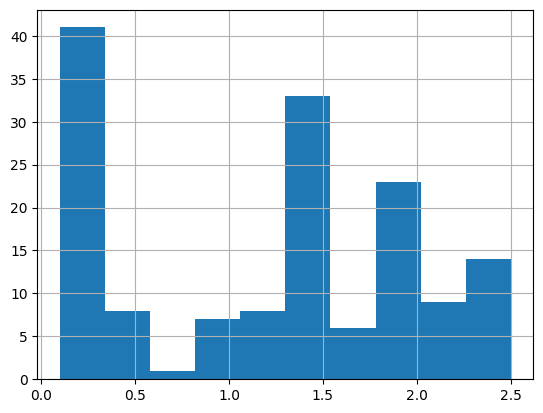

In [12]:
df['PetalWidthCm'].hist()

In [13]:
#scatterplot
colors = ['red', 'purple', 'yellow']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

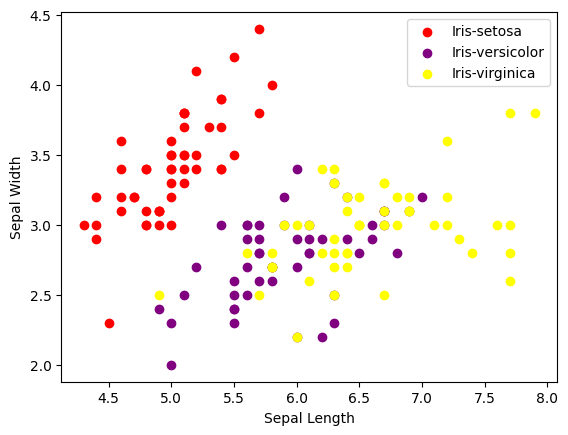

In [14]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

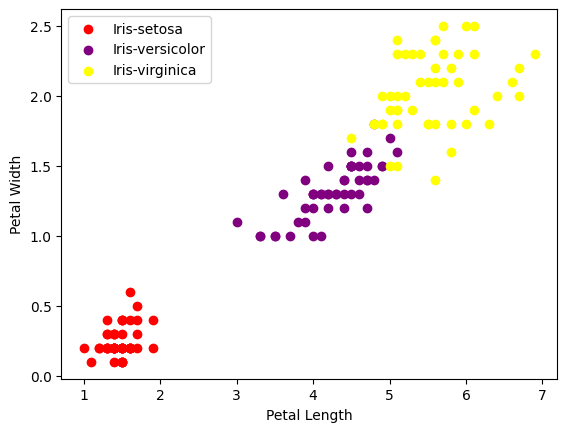

In [15]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

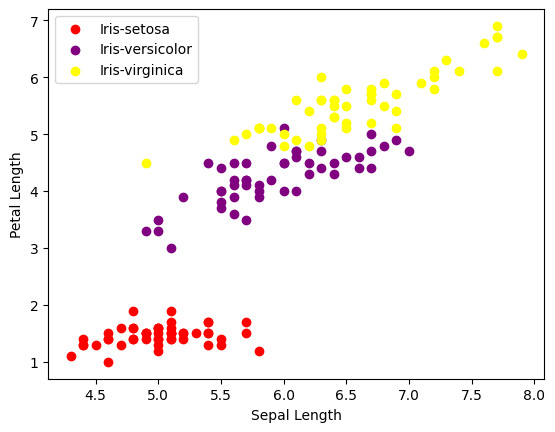

In [16]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

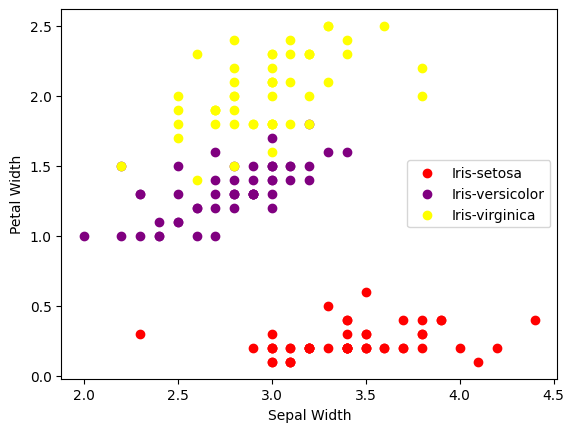

In [17]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-19-3db0a6391e10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

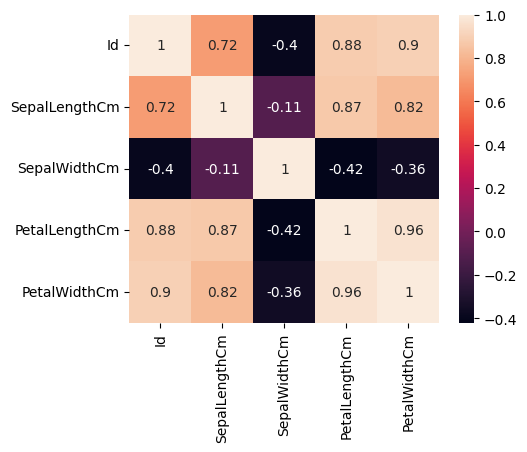

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [23]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)* 100)

Accuracy: 100.0


In [26]:
#knn k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [27]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)* 100)

Accuracy: 100.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
#print metric to get performance
print("Accuracy:", model.score(x_test, y_test)* 100)

Accuracy: 100.0
